In [13]:
import pandas as pd
import json
import numpy as np

In [2]:
usa = pd.read_csv("USA_all.csv")[['date', 'content','renderedContent','hashtags','likeCount','location']]
other = pd.read_csv("all_data_final.csv")[['date', 'content','renderedContent','hashtags','likeCount','Location']]

In [3]:
other.rename({'Location': 'location'}, axis=1, inplace=True)

In [4]:
cities = pd.concat([usa,other],ignore_index=True,axis=0)

In [5]:
cities.shape

(8331, 6)

In [6]:
cities.head(5)

,date,content,renderedContent,hashtags,likeCount,location
0,2020-02-14 03:04:33+00:00,★💰 WORK FROM HOME💰 ★\n I'm Looking For Stay at...,★💰 WORK FROM HOME💰 ★\n I'm Looking For Stay at...,"('bossmom', 'bossbabe', 'joinavon', 'joinmytea...",0.0,New York
1,2020-02-04 23:21:24+00:00,LIMITED TIME! Sign Up for FREE\nEnds March 31....,LIMITED TIME! Sign Up for FREE\nEnds March 31....,"('luzavonsalesrep', 'bosslife', 'bosslady', 'w...",1.0,New York
2,2020-03-31 21:21:25+00:00,Catch our own Tiffany Joy Murchison @Ms_Tiffan...,Catch our own Tiffany Joy Murchison @Ms_Tiffan...,"('Perspectives', 'OVERCOMECOVID19', 'WFH', 'TJ...",0.0,New York
3,2020-03-31 21:18:46+00:00,clocking out is near - make sure to end of you...,clocking out is near - make sure to end of you...,"('WFH', 'spa', 'workingfromhome', 'kyliejenner...",0.0,New York
4,2020-03-31 20:04:07+00:00,😎 she’s so cool... #lea #leainny #stayhome #go...,😎 she’s so cool... #lea #leainny #stayhome #go...,"('lea', 'leainny', 'stayhome', 'goldenretrieve...",0.0,New York


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
cities.hashtags.count()
# have NaN

8329

时间分布

In [9]:
cities.date.iloc[1]

'2020-02-04 23:21:24+00:00'

In [7]:
d = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04']


In [8]:
cities.location.unique()

array(['New York', 'Los Angeles', 'Las Vegas', 'Miami', 'Chicago',
       'Philadelphia', 'Paris', 'Delhi', 'Melbourne', 'Sydney', 'Toronto',
       'London'], dtype=object)

In [9]:
city_d = dict()
for c in cities.location.unique():
    city_d[c] = cities[cities.location ==c]

In [10]:
city_d.keys()

dict_keys(['New York', 'Los Angeles', 'Las Vegas', 'Miami', 'Chicago', 'Philadelphia', 'Paris', 'Delhi', 'Melbourne', 'Sydney', 'Toronto', 'London'])

In [11]:
city_sum = []
for i in city_d.values():
    city_sum.append(len(i))

In [12]:
len(city_d['London'])

2676

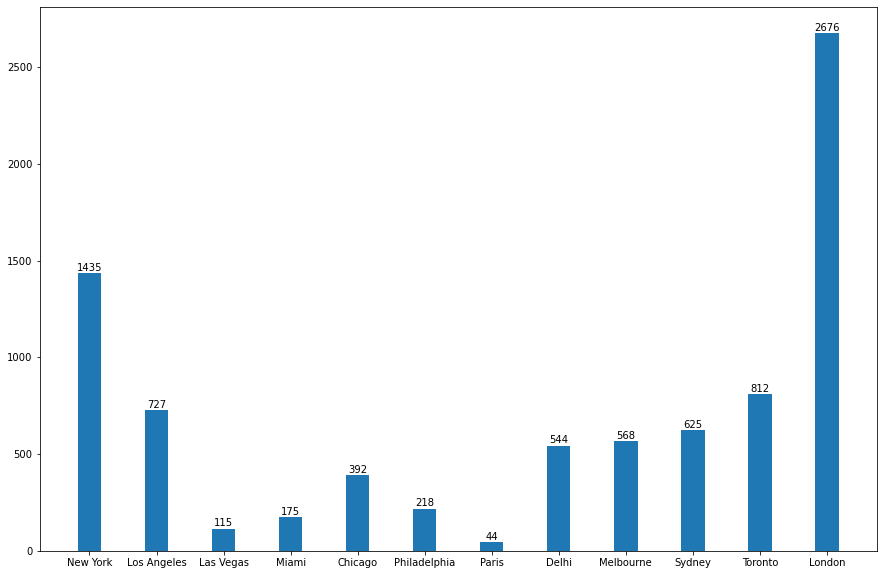

In [21]:
ind = np.arange(len(city_d.keys()))
fig, ax = plt.subplots(1,1,figsize=(15,10))
width = 0.35

count = []
for v in city_d.values():
    count.append(len(v))

ax.bar(ind, count, width = width)
ax.set_xticks(ind)
ax.set_xticklabels(list(city_d.keys()))
for i, j in zip(ind, count):
    plt.text(i, j+1, j, ha='center', va='bottom')

plt.show()



In [15]:
city_time = dict()

In [21]:
for k,v in city_d.items():
    city_time[k] = []
    for time in d:
        
        count = len(v[v['date'].str.contains(time)])
        city_time[k].append(count)   


In [27]:
print(city_time['New York'])
len(city_time['New York'])


[3, 454, 270, 133, 47, 53, 42, 53, 46, 36, 28, 28, 40, 35, 15, 28, 29, 16, 13, 12, 11, 14, 6, 10, 7, 6, 0]


27

In [25]:
import numpy as np

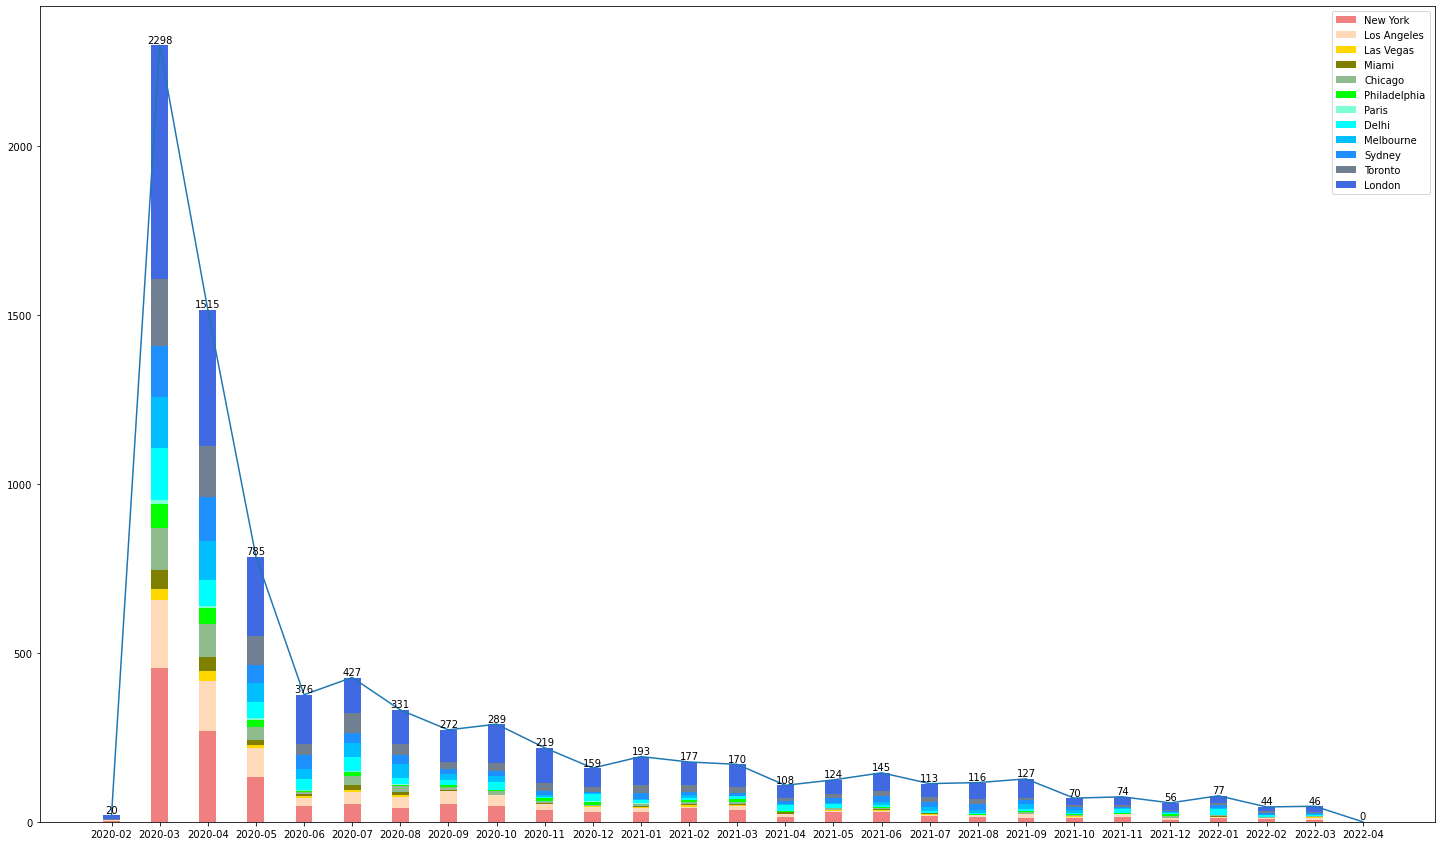

In [77]:
ind = np.arange(27)  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(25,15))

c = ['lightcoral', 'peachpuff', 'gold', 'olive', 'darkseagreen', 
     'lime', 'aquamarine', 'cyan', 'deepskyblue', 'dodgerblue', 
     'slategray', 'royalblue', 'mediumpurple', 'plum', 'hotpink', 
     'crimson', 'silver', 'darkred', 'maroon', 'sandybrown', 'wheat', 
     'honeydew', 'limegreen', 'steelblue']
c_iter = iter(c)

k = list(city_time.keys())
v = list(city_time.values())
s = [0]*27

for i in range(len(k)):
    if i==0:
        ax.bar(ind, v[i], width, color=c[i],label=k[i])
        s = [a+b for a, b in zip(v[i], s)]
    else:
        ax.bar(ind, v[i], width, color=c[i], bottom=s, label=k[i])
        s = [a+b for a, b in zip(v[i], s)]

ax.plot(ind,s)

ax.set_xticks(ind)
ax.set_xticklabels(d)

for i,j in zip(ind, s):
    plt.text(i,j+1,j, ha='center', va='bottom')
ax.legend()
plt.show()


In [33]:

c = ['lightcoral','peachpuff','gold','olive','darkseagreen','lime','aquamarine','cyan','deepskyblue','dodgerblue','slategray','royalblue','mediumpurple','plum','hotpink','crimson','silver','darkred','maroon','sandybrown','wheat','honeydew','limegreen','steelblue']
len(c)

24

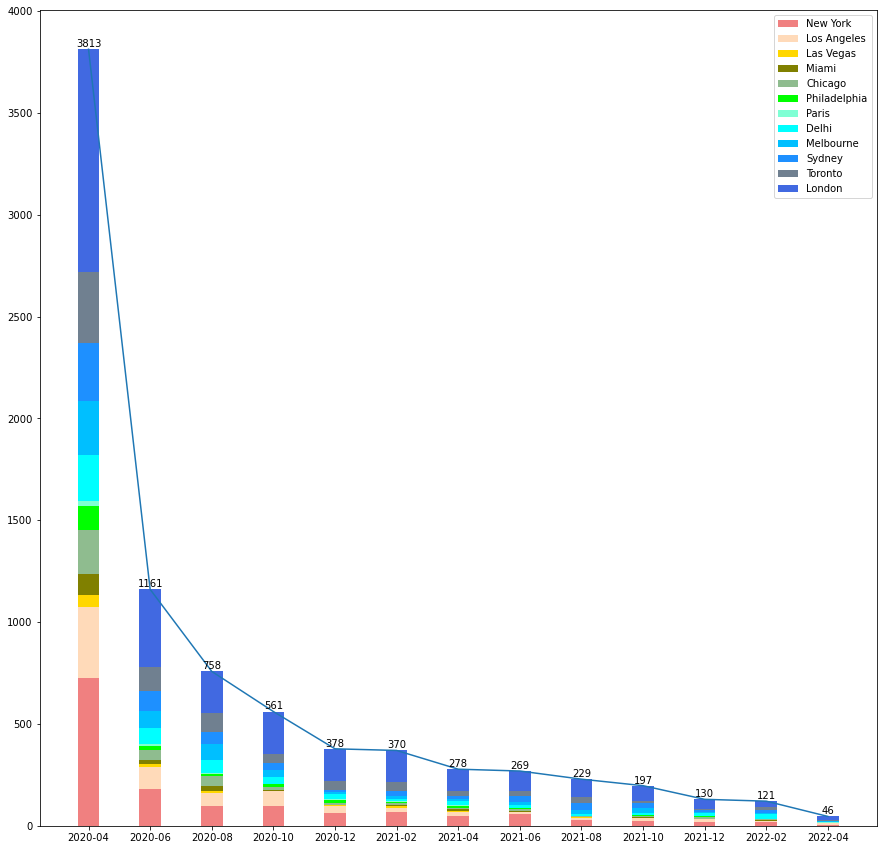

In [82]:
ind = np.arange(27//2)  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

c = ['lightcoral', 'peachpuff', 'gold', 'olive', 'darkseagreen',
     'lime', 'aquamarine', 'cyan', 'deepskyblue', 'dodgerblue',
     'slategray', 'royalblue', 'mediumpurple', 'plum', 'hotpink',
     'crimson', 'silver', 'darkred', 'maroon', 'sandybrown', 'wheat',
     'honeydew', 'limegreen', 'steelblue']
c_iter = iter(c)

k = np.array(list(city_time.keys()))
v = np.array(list(city_time.values()))
s = [0]*27
v_tmp = []
for i in range(len(v)):
    tmp = []
    v1 = v[i]
    for j in range(1,len(v1),2):
        tmp.append(v1[j]+v1[j+1])
    v_tmp.append(tmp)
    
for i in range(len(k)):
    if i == 0:
        ax.bar(ind, v_tmp[i], width, color=c[i], label=k[i])
        s = [a+b for a, b in zip(v_tmp[i], s)]
    else:
        ax.bar(ind, v_tmp[i], width, color=c[i], bottom=s, label=k[i])
        s = [a+b for a, b in zip(v_tmp[i], s)]

ax.plot(ind, s)

ax.set_xticks(ind)
tmp = []
for i in range(0, len(k), 2):
    tmp.append(d[i]+"~"+d[i+1])
ax.set_xticklabels(d[2::2])

for i, j in zip(ind, s):
    plt.text(i, j+1, j, ha='center', va='bottom')
ax.legend()
plt.show()


In [73]:
len(d[1::2])


13

In [64]:
for i in v_tmp:
    print(len(i))

13
13
13
13
13
13
13
13
13
13
13
13


In [59]:
k = np.array(list(city_time.keys()))
v = np.array(list(city_time.values()))
v[0]+v[1]


array([  4, 656, 416, 219,  70,  89,  74,  90,  79,  54,  44,  41,  45,
        48,  22,  33,  33,  21,  19,  22,  15,  22,  10,  13,  11,  12,
         0])

In [28]:
len(city_time)

12

In [61]:
len(ind)

13